In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import acquire
import prepare

In [2]:
# acquire.pull_csv_file()
df = acquire.read_telco_data()
df.head(1)

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL


In [3]:
df = prepare.prep_data(df)
df.head(1)

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years,is_churn
0,1,2,1,0003-MKNFE,0,0,0,0,9,1,...,1,0,59.9,542.4,0,Month-to-month,Mailed check,DSL,0,0


In [4]:
df.is_churn.mean()

0.2653698707936959

In [5]:
train, validate, test = prepare.split_data(df)

In [6]:
train.is_churn.mean()

0.2672189349112426

In [7]:
train.is_churn.mean()

0.2672189349112426

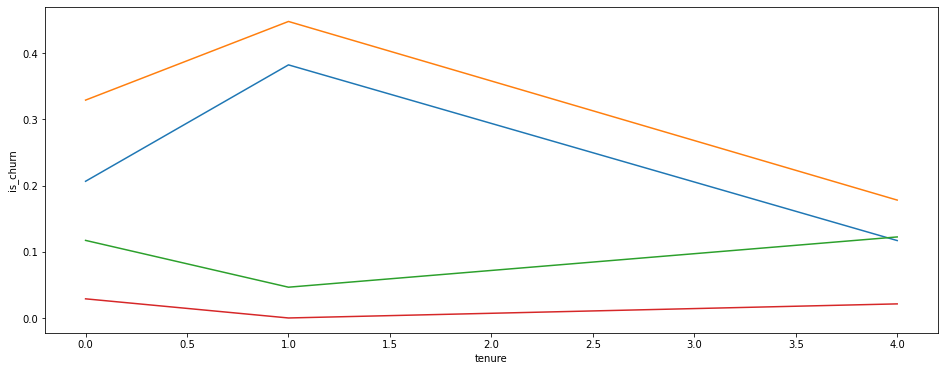

In [8]:
x = train.tenure // 6
y = train.groupby(train.tenure // 6).is_churn.mean()
y1 = train[train.contract_type == 'Month-to-month'].groupby(train.tenure // 6).is_churn.mean()
y2 = train[train.contract_type == 'One year'].groupby(train.tenure // 6).is_churn.mean()
y3 = train[train.contract_type == 'Two year'].groupby(train.tenure // 6).is_churn.mean()

plt.figure(figsize=(16,6))
plt.legend
sns.lineplot(x, y, data=train, ci=None)
sns.lineplot(x, y1, data=train, ci=None)
sns.lineplot(x, y2, data=train, ci=None)
sns.lineplot(x, y3, data=train, ci=None)

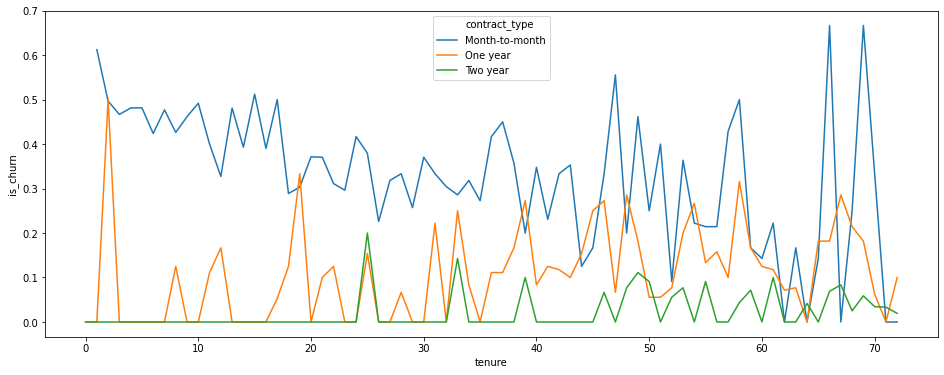

In [9]:
plt.figure(figsize=(16,6))
sns.lineplot('tenure', 'is_churn', hue='contract_type', data=train, ci=None)

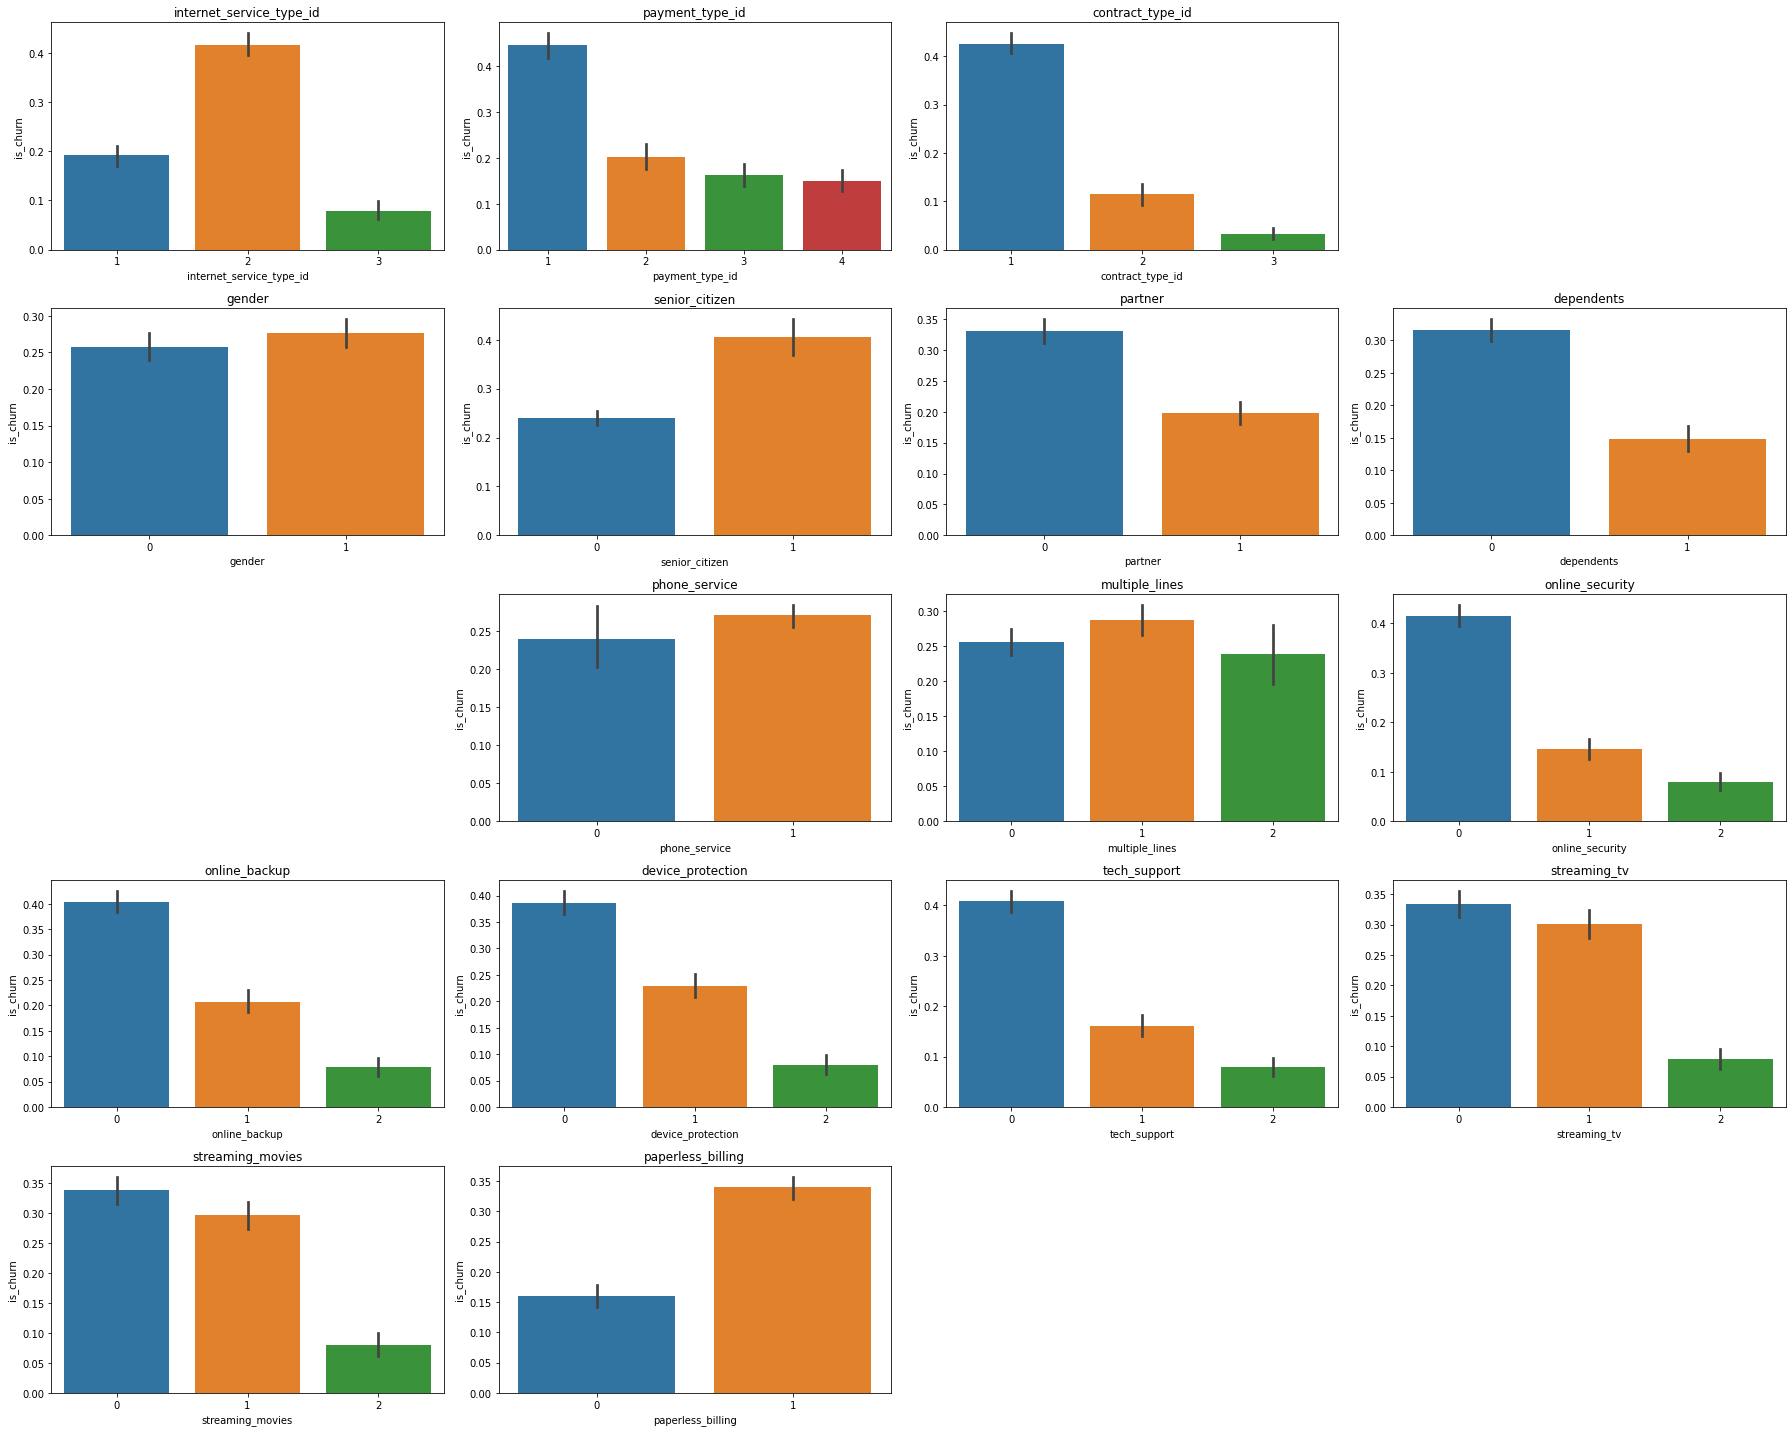

In [10]:
f = plt.figure(figsize=(25,20))
for i in range(0,20):
    if len(train.groupby(train.iloc[:,i])) < 5:
        f.add_subplot(5,4, i+1)
        sns.barplot(data=train, y="is_churn", x=train.iloc[:,i])
        plt.title(train.columns[i])
plt.tight_layout()
plt.show()

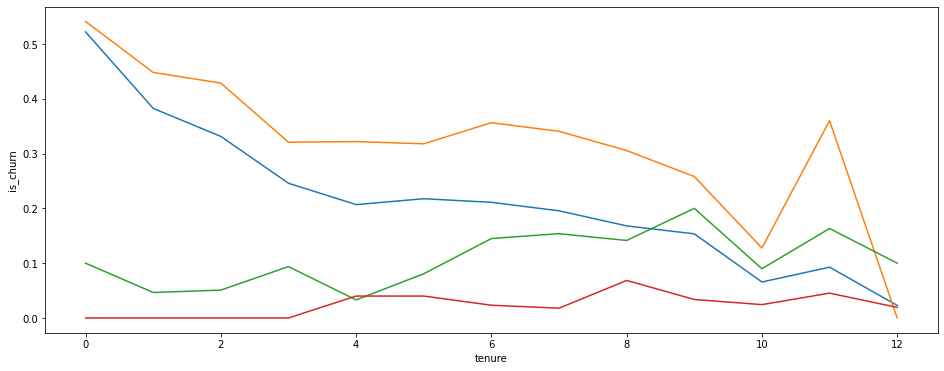

In [11]:
x = train.groupby(train.tenure // 6).tenure.sum().index
y = train.groupby(train.tenure // 6).is_churn.mean()
y1 = train[train.contract_type == 'Month-to-month'].groupby(train.tenure // 6).is_churn.mean()
y2 = train[train.contract_type == 'One year'].groupby(train.tenure // 6).is_churn.mean()
y3 = train[train.contract_type == 'Two year'].groupby(train.tenure // 6).is_churn.mean()

plt.figure(figsize=(16,6))
plt.legend
sns.lineplot(x, y, data=train, ci=None)
sns.lineplot(x, y1, data=train, ci=None)
sns.lineplot(x, y2, data=train, ci=None)
sns.lineplot(x, y3, data=train, ci=None)

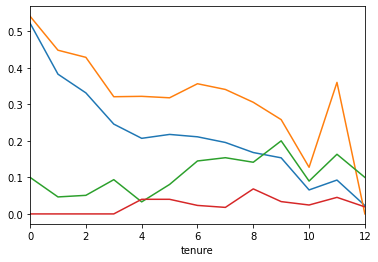

In [12]:
train.groupby(train.tenure // 6).is_churn.mean().plot()
train[train.contract_type == 'Month-to-month'].groupby(train.tenure // 6).is_churn.mean().plot()
train[train.contract_type == 'One year'].groupby(train.tenure // 6).is_churn.mean().plot()
train[train.contract_type == 'Two year'].groupby(train.tenure // 6).is_churn.mean().plot()


In [13]:
train.groupby(train.tenure // 6).tenure.sum().index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='tenure')

In [14]:
train['tenure_grouped'] = train.tenure // 6

In [15]:
train.groupby('tenure_grouped').tenure.sum().index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='tenure_grouped')

In [16]:
train.tenure_grouped

440      1
67       0
600      0
4883    11
1258    10
        ..
1794     9
817      0
901      0
1987     9
6958     2
Name: tenure_grouped, Length: 4225, dtype: int64

## Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

In [17]:
train.is_churn.value_counts()

0    3096
1    1129
Name: is_churn, dtype: int64

In [18]:
# x = train.groupby((train.monthly_charges // 10)*10).is_churn.mean().index
# y = train.groupby((train.monthly_charges//10)*10).is_churn.mean().plot()

# sns.lineplot(x, y)
train.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years,is_churn,tenure_grouped
440,1,4,1,3701-SFMUH,0,0,1,1,7,1,...,0,69.70,516.15,0,Month-to-month,Credit card (automatic),DSL,0,0,1
67,1,1,1,0674-EYYZV,1,0,0,0,1,1,...,1,54.65,54.65,0,Month-to-month,Electronic check,DSL,0,0,0
600,1,4,1,4918-QLLIW,0,0,0,0,3,1,...,0,53.40,188.70,1,Month-to-month,Credit card (automatic),DSL,0,1,0
4883,2,4,2,6097-EQISJ,1,0,1,1,66,1,...,1,102.45,6615.15,1,One year,Credit card (automatic),Fiber optic,5,1,11
1258,1,3,2,0654-PQKDW,1,0,1,1,62,1,...,1,70.75,4263.45,0,One year,Bank transfer (automatic),DSL,5,0,10


In [19]:
train.internet_service_type.value_counts(), train.internet_service_type_id.value_counts()

(Fiber optic    1866
 DSL            1454
 None            905
 Name: internet_service_type, dtype: int64, 2    1866
 1    1454
 3     905
 Name: internet_service_type_id, dtype: int64)

In [20]:
# # male_mask = train.gender == 0
# # female_mask = train.gender == 1
churn = pd.DataFrame(train.groupby((train.monthly_charges // 5)*5).is_churn.mean())
# # churn_output['is_male'] = train[male_mask].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# # churn_output["is_female"] = train[female_mask].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["paperless"] = train[train.paperless_billing == 1].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["mailed_bill"] = train[train.paperless_billing == 0].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["fiber_optic"] = train[train.internet_service_type_id == 2].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["dsl"] = train[train.internet_service_type_id == 1].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["no_internet"] = train[train.internet_service_type_id == 3].groupby((train.monthly_charges // 5)*5).is_churn.mean()

churn.head()

,is_churn
monthly_charges,
15.0,0.095890
20.0,0.101099
25.0,0.121212
30.0,0.339623
35.0,0.237288


In [41]:
def subset_churn_data(column_list):
    df = pd.DataFrame(train.groupby((train.monthly_charges // 5)*5).is_churn.mean())
    for c in column_list:
        subset_list = train[c].value_counts().index
        for i in subset_list:
            df[i] = train[train[c] == i].groupby((train.monthly_charges // 5)*5).is_churn.mean()
    return df
    

In [48]:
column_list = ['internet_service_type', 'payment_type', 'contract_type', 'dependents']
churn = subset_churn_data(column_list)
churn.head(1)

,is_churn,Fiber optic,DSL,None,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic),Month-to-month,Two year,One year,0,1
monthly_charges,,,,,,,,,,,,,
15.0,0.09589,NaN,NaN,0.09589,0.228571,0.107143,0.026316,0.068966,0.195946,0.01626,0.042553,0.102222,0.085714


In [49]:
def make_churn_bar_plots(df):
    f = plt.figure(figsize=(16,100))
    x = churn.shape[1]
    for i in range(0, x):
        f.add_subplot(20, 1, i+1)
        sns.barplot(data=churn, y=churn.iloc[:,i], x=churn.index)
        plt.title(churn.columns[i])
    plt.tight_layout()
    plt.show() 


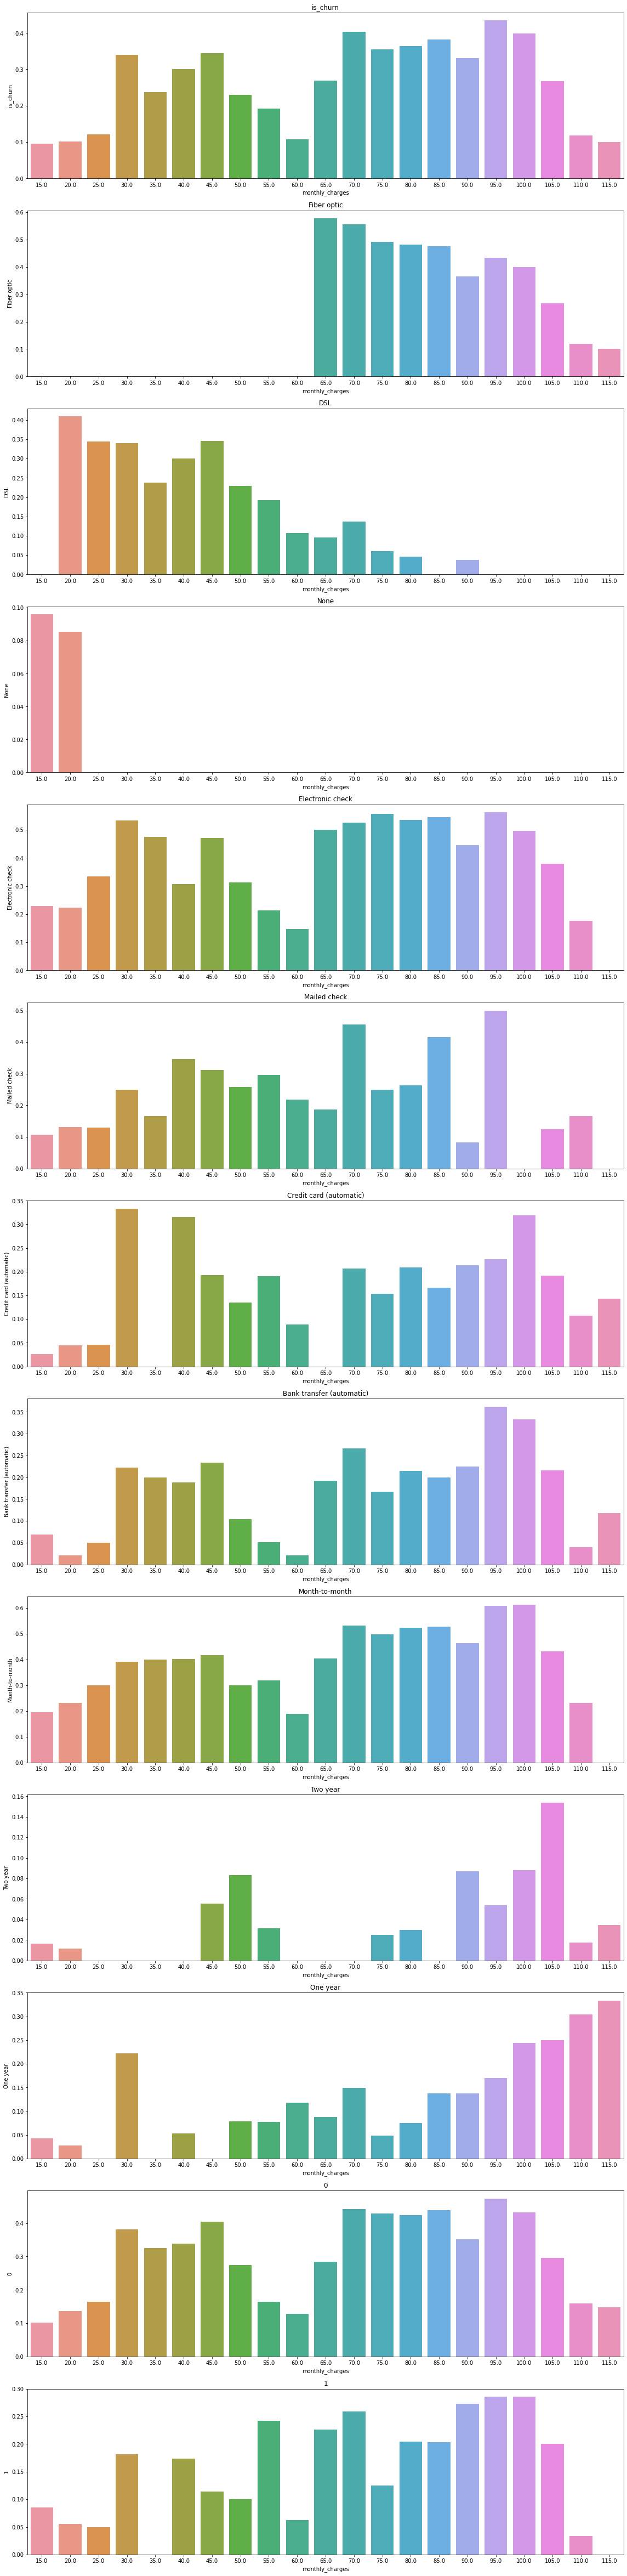

In [50]:
make_churn_bar_plots(churn)

In [ ]:
subset_churn_data('internet_service_type').index[0]

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(3,1,1)
sns.barplot(x, churn.fiber_optic)
plt.subplot(3,1,2)
sns.barplot(x, churn.dsl)
plt.subplot(3,1,3)
sns.barplot(x, churn.no_internet)

In [ ]:
# f = plt.figure(figsize=(25,20))

# for i in range(0,21):
#     if len(train.groupby(train.iloc[:,i+3])) < 5:
#         f.add_subplot(5,5, i+1)
#         sns.lineplot(data=train, y="is_churn", x=train.iloc[:,i+3])
#         plt.title(train.columns[i+3])
# plt.tight_layout()
# plt.show()

In [ ]:
# Does the monthly charges of people with online_security, tech_support, device_protection and online_backup different than the rest?
group = ["online_security", "online_backup", "tech_support", "device_protection"]
pd.pivot_table(train, values="monthly_charges", index=group, columns="churn", aggfunc="mean").reset_index()

In [ ]:
# Does the monthly charges of people with online_security, tech_support, device_protection and online_backup different than the rest?
group = ["online_security", "online_backup", "tech_support", "device_protection"]
pd.pivot_table(train, values="monthly_charges", index=group, columns="churn", aggfunc="count").reset_index()

In [51]:
train.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years,is_churn,tenure_grouped
440,1,4,1,3701-SFMUH,0,0,1,1,7,1,...,0,69.70,516.15,0,Month-to-month,Credit card (automatic),DSL,0,0,1
67,1,1,1,0674-EYYZV,1,0,0,0,1,1,...,1,54.65,54.65,0,Month-to-month,Electronic check,DSL,0,0,0
600,1,4,1,4918-QLLIW,0,0,0,0,3,1,...,0,53.40,188.70,1,Month-to-month,Credit card (automatic),DSL,0,1,0
4883,2,4,2,6097-EQISJ,1,0,1,1,66,1,...,1,102.45,6615.15,1,One year,Credit card (automatic),Fiber optic,5,1,11
1258,1,3,2,0654-PQKDW,1,0,1,1,62,1,...,1,70.75,4263.45,0,One year,Bank transfer (automatic),DSL,5,0,10


In [61]:
pd.crosstab(columns=train.is_churn, index=([train.contract_type, train.internet_service_type]), values=train.is_churn, aggfunc='mean')

is_churn                              0  1
contract_type  internet_service_type      
Month-to-month DSL                    0  1
               Fiber optic            0  1
               None                   0  1
One year       DSL                    0  1
               Fiber optic            0  1
               None                   0  1
Two year       DSL                    0  1
               Fiber optic            0  1
               None                   0  1